# Multi Layer Perceptron
  16BCE1259
  
  Shushil Kumar Ravishankar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [2]:
data=pd.read_csv('clean_bmart.csv',sep=',')
data.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
X=data.loc[(data['Outlet_Location_Type']=='Tier 1')|(data['Outlet_Location_Type']=='Tier 2')]
x=X.values[:,:]
y=X.values[:,10]
ley=LabelEncoder()
ley.fit(y)
y=ley.transform(y)
for i in [1,3,5,7,9,11]:
    en=LabelEncoder()
    en.fit(X.values[:,i])
    x[:,i]=en.transform(x[:,i])

x=x[:,[1,2,3,4,5,6,7,8,9,11,12]]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(y)
print(x)
print(data.columns.values[[4,8,10]])

[0 0 1 ... 1 1 0]
[[156 9.3 0 ... 0 1 3735.138]
 [659 17.5 0 ... 0 1 2097.27]
 [438 16.2 1 ... 0 1 1076.5986]
 ...
 [890 8.38 1 ... 0 1 549.285]
 [1348 10.6 0 ... 1 1 1193.1136]
 [50 14.8 0 ... 1 1 765.67]]
['Item_Visibility' 'Outlet_Establishment_Year' 'Outlet_Location_Type']


In [4]:
from sklearn.neural_network import MLPClassifier

In [5]:
error=[]
iteration=[]
for i in range(1,1000):
    iteration.append(i)
    mlp=MLPClassifier(hidden_layer_sizes=(5),max_iter=i,random_state=0)
    mlp.fit(X_train,y_train)
    predictions=mlp.predict(X_test)
    error.append(1-accuracy_score(y_test, predictions))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: Convergence

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (31) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: Converge

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (59) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


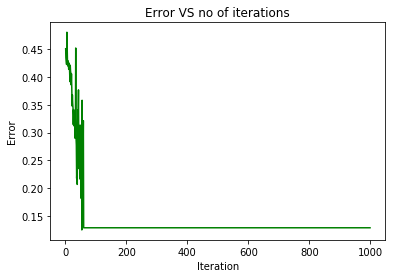

In [6]:
plt.plot(iteration,error,color='g')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error VS no of iterations')
plt.show()

In [7]:
error.index(min(error))

53

In [8]:
min(error)

0.125

In [9]:
mlp=MLPClassifier(hidden_layer_sizes=(5),max_iter=error.index(min(error))+1,random_state=0)
mlp.fit(X_train,y_train)
predictions=mlp.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (54) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [10]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[597  97]
 [ 97 761]]


In [11]:
print('Accuracy: %.2f' % accuracy_score(y_test, predictions))

Accuracy: 0.88


In [13]:
size=[]
error=[]
for i in range(0,10):
    for j in range(0,10):
        for k in range(0,10):
            var=[]
            if i!=0:
                var.append(i)
            if j!=0:
                var.append(j)
            if k!=0:
                var.append(k)
            if var!=[]:
                size.append(tuple(var))
for i in size:
    mlp=MLPClassifier(hidden_layer_sizes=i,max_iter=54,random_state=0)
    mlp.fit(X_train,y_train)
    predictions=mlp.predict(X_test)
    error.append(1-accuracy_score(y_test, predictions))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (54) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [15]:
from tabulate import tabulate

In [16]:
table=[]
for i in range(len(size)):
    table.append([size[i],error[i]])

In [19]:
print(tabulate(table, headers=['Size', 'Error']))

Size          Error
---------  --------
(1,)       0.447165
(2,)       0.462629
(3,)       0.447165
(4,)       0.373067
(5,)       0.125
(6,)       0.439433
(7,)       0.256443
(8,)       0.559278
(9,)       0.39884
(1,)       0.447165
(1, 1)     0.552835
(1, 2)     0.447165
(1, 3)     0.447165
(1, 4)     0.447165
(1, 5)     0.447165
(1, 6)     0.409794
(1, 7)     0.447165
(1, 8)     0.58183
(1, 9)     0.447165
(2,)       0.462629
(2, 1)     0.447165
(2, 2)     0.536082
(2, 3)     0.496134
(2, 4)     0.539948
(2, 5)     0.46134
(2, 6)     0.440722
(2, 7)     0.448454
(2, 8)     0.446521
(2, 9)     0.461985
(3,)       0.447165
(3, 1)     0.552835
(3, 2)     0.552191
(3, 3)     0.349227
(3, 4)     0.438789
(3, 5)     0.606314
(3, 6)     0.411727
(3, 7)     0.5
(3, 8)     0.499356
(3, 9)     0.42268
(4,)       0.373067
(4, 1)     0.552835
(4, 2)     0.537371
(4, 3)     0.447165
(4, 4)     0.447165
(4, 5)     0.376933
(4, 6)     0.405928
(4, 7)     0.366624
(4, 8)     0.367268
(4, 9)     0

In [20]:
min(error)

0.125

In [21]:
error.index(min(error))

4

In [22]:
size[error.index(min(error))]

(5,)